In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 

In [2]:
data = np.genfromtxt("../../data/data.dat")

In [3]:
# Create dataframe for easier operations/manipulation
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   404 non-null    float64
 1   alph1   404 non-null    float64
 2   alph2   404 non-null    float64
 3   beta    404 non-null    float64
 4   chi     404 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB


There are five parameters and 403 data entries. For the problem we want to solve, ustat, alph1, alph2, and beta are features, while chi is our target.

#### Scatterplot Visualization: We want to find initial patterns/relationships in our current data. Let's visualize the relationships of the features with regards to chi.

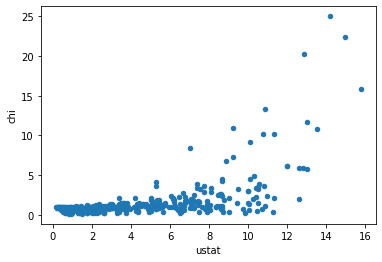

In [5]:
# Ustat v Chi
scatter1 = df.plot.scatter(x='ustat', y='chi')

Based on this scatter, we see a greater number of points lying in the bottom to bottom-left region. However, there does not appear to be a clear relationship with regards to both variables. 

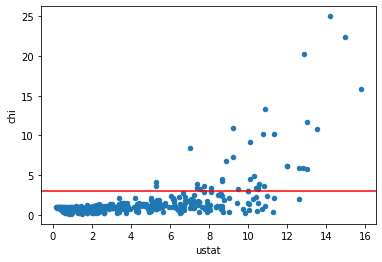

In [6]:
# annotated

df.plot.scatter(x='ustat', y='chi')
plt.axhline(y=3, color='r', linestyle='-')

Houston and group previously divided this scatter at chi = 3, in which points lying below the horizontal line are deemed 'small chi' and points lying at or above are deemed 'large chi.' See Reference 2.

<AxesSubplot:xlabel='alph1', ylabel='chi'>

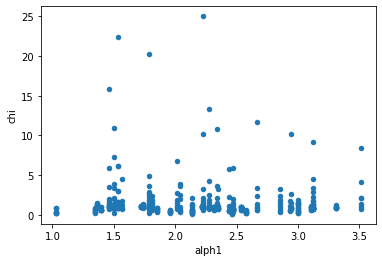

In [7]:
# Alph1 v Chi

df.plot.scatter(x='alph1', y='chi')

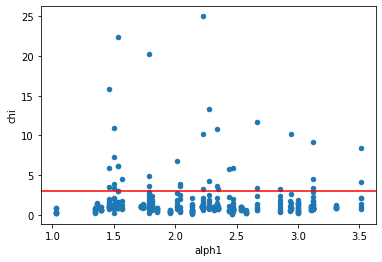

In [8]:
# annotated

df.plot.scatter(x='alph1', y='chi')
plt.axhline(y=3, color='r', linestyle='-')

<AxesSubplot:xlabel='alph2', ylabel='chi'>

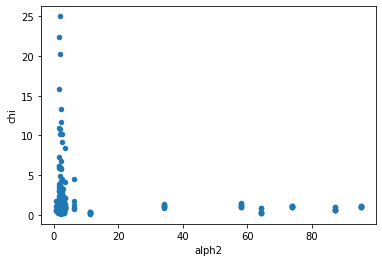

In [9]:
# Alph2 v Chi

df.plot.scatter(x='alph2', y='chi')

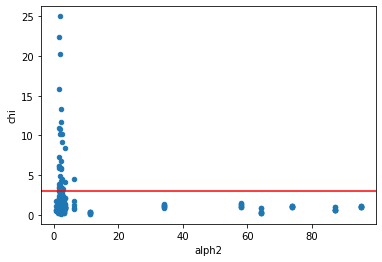

In [10]:
# annotated

df.plot.scatter(x='alph2', y='chi')
plt.axhline(y=3, color='r', linestyle='-')

<AxesSubplot:xlabel='beta', ylabel='chi'>

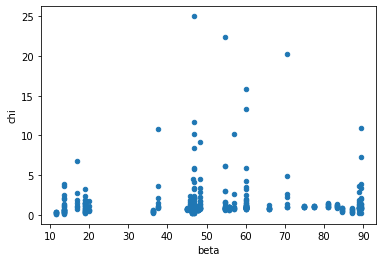

In [11]:
# Beta v Chi

df.plot.scatter(x='beta', y='chi')

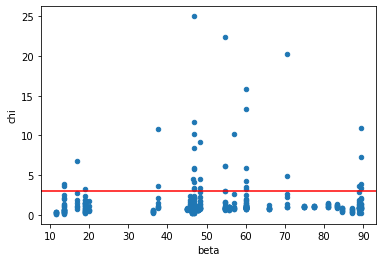

In [12]:
# annotated

df.plot.scatter(x='beta', y='chi')
plt.axhline(y=3, color='r', linestyle='-')

Based on the scatter results for the remaining features, we do not find a clear relationship with any of the features with the target. Some observations to note:

    1. There is a large number of data entries with an alph2 value near 0. 
    2. There appears to be outlier entries beyond alph2 = 10, in which the alph2 value is very large.
    3. 'Large chi' values do not appear when alph2 is greater than 10. 
    3. Chi values greater than 10 appear more often at beta range 40 - 70.


#### Box Plot Visualization: We want to find the distribution for each of the variables, so we can find any patterns in the data. This may be helpful when we preprocess the data in later steps (i.e. binning, encoding). 

<AxesSubplot:>

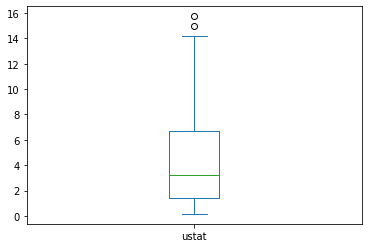

In [13]:
df['ustat'].plot.box()

In [14]:
df['ustat'].quantile([0.25,0.5,0.75])

0.25    1.430864
0.50    3.250437
0.75    6.675925
Name: ustat, dtype: float64

In [15]:
print(df['ustat'].mean())
print(df['ustat'].median())
print(df['ustat'].min())
print(df['ustat'].max())

4.26568818909009
3.2504369501859998
0.159464446468
15.747413833915


<AxesSubplot:>

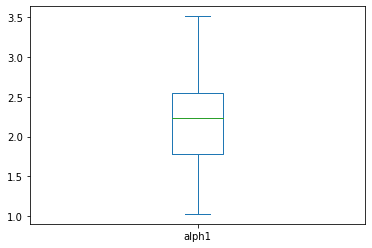

In [16]:
df['alph1'].plot.box()

In [17]:
df['alph1'].quantile([0.25,0.5,0.75])

0.25    1.787582
0.50    2.228934
0.75    2.541756
Name: alph1, dtype: float64

In [18]:
print(df['alph1'].mean())
print(df['alph1'].median())
print(df['alph1'].min())
print(df['alph1'].max())

2.211244470168693
2.228934005606
1.030203627823
3.509591530055


<AxesSubplot:>

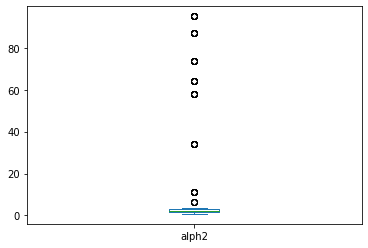

In [19]:
df['alph2'].plot.box()

<AxesSubplot:>

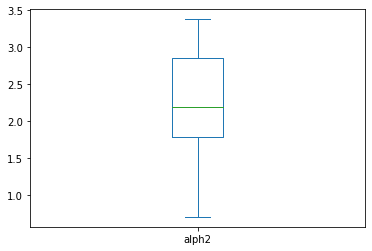

In [20]:
df['alph2'].plot.box(showfliers=False)

In [21]:
df['alph2'].quantile([0.25,0.5,0.75])

0.25    1.790162
0.50    2.191919
0.75    2.856577
Name: alph2, dtype: float64

In [22]:
print(df['alph2'].mean())
print(df['alph2'].median())
print(df['alph2'].min())
print(df['alph2'].max())

10.2813035588216
2.191918885013
0.708486898555
95.116808437375


<AxesSubplot:>

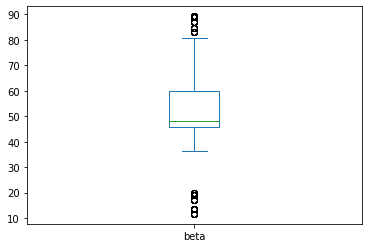

In [23]:
df['beta'].plot.box()

<AxesSubplot:>

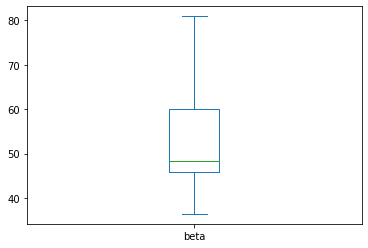

In [24]:
df['beta'].plot.box(showfliers=False)

In [25]:
df['beta'].quantile([0.25,0.5,0.75])

0.25    45.8
0.50    48.2
0.75    60.0
Name: beta, dtype: float64

In [26]:
print(df['beta'].mean())
print(df['beta'].median())
print(df['beta'].min())
print(df['beta'].max())

52.07400990099003
48.2
11.6
89.3


<AxesSubplot:>

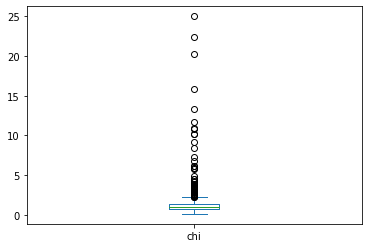

In [27]:
df['chi'].plot.box()

<AxesSubplot:>

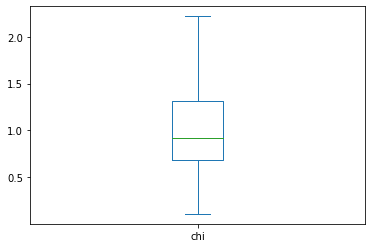

In [28]:
df['chi'].plot.box(showfliers=False)

In [29]:
df['chi'].quantile([0.25,0.5,0.75])

0.25    0.689301
0.50    0.920766
0.75    1.313009
Name: chi, dtype: float64

In [30]:
print(df['chi'].mean())
print(df['chi'].median())
print(df['chi'].min())
print(df['chi'].max())

1.5629289468013072
0.9207655646840001
0.108573734733
25.005331620136


#### Clustering. I wanted to see if there was a more systematic approach to dividing the chi values into 'small chi' and 'large chi.' Houston and group visually divided the two. 

In [31]:
# extract desired values, convert into array
ustat_chi = df.iloc[:,[0,4]].values

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. (from Scikit Learn)

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
# This includes the point itself.

dbscan = DBSCAN(eps=1, min_samples=6)

In [34]:
labels = dbscan.fit_predict(ustat_chi)

In [35]:
# -1 == noise

np.unique(labels)

array([-1,  0], dtype=int64)

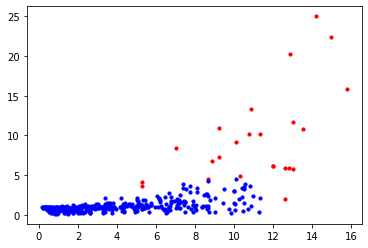

In [36]:
plt.scatter(ustat_chi[labels== -1,0], ustat_chi[labels == -1,1], s = 10, c = 'red')
plt.scatter(ustat_chi[labels== 0,0], ustat_chi[labels == 0,1], s = 10, c = 'blue')

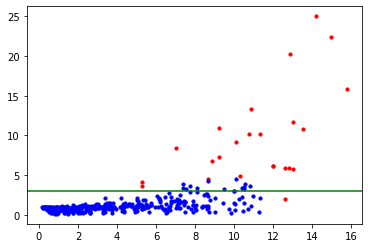

In [37]:
plt.scatter(ustat_chi[labels== -1,0], ustat_chi[labels == -1,1], s = 10, c = 'red')
plt.scatter(ustat_chi[labels== 0,0], ustat_chi[labels == 0,1], s = 10, c = 'blue')
plt.axhline(y=3, color='green', linestyle='-')

Although we cannot exactly replicate the results from pure visualization, we achieved a separation that is very close. It is important to note that the blue dots represent one cluster and the red dots represent outliers, according to DB Scan. The psilon value and min_sample values were decided through trial and error. Most data entries lie very close, and hence are neighbors, with one another. 